In [61]:
from paths import DATASET_IMG
import os
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

In [41]:
xml_files, png_files = [], []
for file in os.listdir(DATASET_IMG):
    xml_files.append(str(DATASET_IMG / file)) if file.endswith('.xml') else png_files.append(str(DATASET_IMG / file))

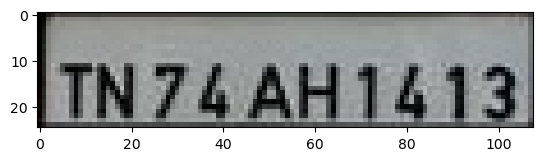

In [40]:
img = cv2.cvtColor(cv2.imread(str(png_files[44])), cv2.COLOR_BGR2RGB)
tree = ET.parse(xml_files[44])
root = tree.getroot()

# Extract bounding box
bndbox = root.find('.//bndbox')
xmin = int(bndbox.find('xmin').text)
ymin = int(bndbox.find('ymin').text)
xmax = int(bndbox.find('xmax').text)
ymax = int(bndbox.find('ymax').text)

licensplate = img[ymin:ymax, xmin:xmax]
plt.imshow(licensplate)

In [45]:
samples = []
for image_path, xml_path in zip(png_files, xml_files):
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    # Load XML from file
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # Extract bounding box
    bndbox = root.find('.//bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    licenseplate = img[ymin:ymax, xmin:xmax]
    samples.append(licenseplate)




In [ ]:
train_test_split()

In [ ]:
_, fig = plt.subplots(5, 5, figsize=(10, 10))
num = 0
for i in range(5):
    for j in range(5):
        fig[i, j].imshow(samples[num])
        num += 1
